# Predicting Home Prices
In this notebook we'll attempt to predict the final sale price of a home based on its features and surroundings, using various advanced regression techniques.

The overview on the competition page is as follows:

*Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.*

*With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.*

The competion page can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

# <span style="color:green;"> I. Read in Data </span>
This time the data has already been collected and split into train and test data for us by Kaggle.

Let's read in the data and see what we'll be working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Wow, it looks like we have a lot of columns to work with. 

However, just because a column is included in the original data doesn't mean it will be useful for our goal of predicting home prices, so we may end up not using all of these in our final model.

## Data Dictionary
Here's a summary of the definitions for each column from the competition's data page.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# <span style="color:green;"> II. Wrangle, Prepare, and Clean Data </span>

## A. Missing Values
Let's start by confirming the data type of each column, and checking for null values.

In [2]:
print('Train:')
print(train.dtypes)
print()
print('Test:')
print(test.dtypes)

Train:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           

In [3]:
print('Train:')
print(train.isnull().sum())
print()
print('Test:')
print(test.isnull().sum())

Train:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
Low

There are a fair number of columns that contain missing values.
Let's look at the distribution of each column next.

In [4]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [5]:
test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,1443,1444.000000,1459,1459,1459,1415,1414,1415,1417,1458.000000,1417,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,729,1383,1381.000000,1381,1458.000000,1458.000000,1381,1381,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,13,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,364,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0

Out of 1,460 rows, over 80% are missing values for Alley, PoolQC, Fence, and MiscFeature.

Looking at the data description file on the competition page, many of the columns with a large number of missing values are using NaN to represent the entry not having that feature (a NaN value in the Alley column indicates that the property has no access to an alley, for example).

Let's fill in the missing values for those columns with "NA" and then re-examine our null values.

In [6]:
null_to_na_cols = ['Alley', 'MasVnrType','BsmtQual', 
                   'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                   'BsmtFinType2', 'FireplaceQu', 'GarageType',
                   'GarageFinish', 'GarageQual', 'GarageCond', 
                   'PoolQC', 'Fence', 'MiscFeature']

train[null_to_na_cols] = train[null_to_na_cols].fillna('NA')
test[null_to_na_cols] = test[null_to_na_cols].fillna('NA')

print('Train:')
print(train.isnull().sum())
print()
print('Test:')
print(test.isnull().sum())

Train:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFu

In [7]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460,1452.000000,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460,1460,1379.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,5,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NA,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NA,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,690,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.

In [8]:
test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,1459,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,1459,1444.000000,1459,1459,1459,1459,1459,1459,1459,1458.000000,1459,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,1459,1459,1381.000000,1459,1458.000000,1458.000000,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1459,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,1,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,13,15,5,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,4,NaN,NaN,5,6,3,NaN,NaN,NaN,NaN,NaN,NaN,3,5,4,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NA,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NA,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,1352,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,730,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,1456,1169,1408,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.0

That took care of most of our missing values. Now let's deal with the remaining ones.

There are 3 main ways we can deal with missing values:
1. **Drop**: Remove either rows or columns with missing values
2. **Impute**: Fill in the missing values using the mean, mode, or other estimate
3. **Predict**: Create a model to predict the missing values using the other variables

In this analysis we will use the first 2. Generally it is more desirable to impute than to drop, because we often lose other information when we drop rows and columns.

Looking at the distributions of each column that we used earlier, it looks safe to impute the mean/mode for most of the remaining columns.

However, since GarageYrBlt is highly correlated with YearBuilt, and since Utilities is almost 100% the same value, I have decided to drop these two columns.

In [9]:
train[['YearBuilt', 'GarageYrBlt']].corr()

,YearBuilt,GarageYrBlt
YearBuilt,1.000000,0.825667
GarageYrBlt,0.825667,1.000000


In [10]:
train.drop(columns=['GarageYrBlt', 'Utilities'], inplace=True)

test.drop(columns=['GarageYrBlt', 'Utilities'], inplace=True)

ms_zones = train['MSZoning'].unique()
for zone in ms_zones:
    zone_mean_train = train[train['MSZoning'] == zone]['LotFrontage'].mean()
    zone_mean_test = test[test['MSZoning'] == zone]['LotFrontage'].mean()
    train[train['MSZoning'] == zone]['LotFrontage'].fillna(zone_mean_train, inplace=True)
    test[test['MSZoning'] == zone]['LotFrontage'].fillna(zone_mean_test, inplace=True)

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
train.fillna(train.mode().iloc[0], inplace=True)
test.fillna(test.mode().iloc[0], inplace=True)

print('Train:')
print(train.isnull().sum())
print()
print('Test:')
print(test.isnull().sum())

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Train:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitch

## B. Select Features

Next, it would be useful to examine which columns have significant predictive power for our target.

Correlation is often used to do this, but one drawback of correlation is that it only measures linear relationships.
An alternative measure is **Mutual Information**, which measures how much knowledge of the value of a given variable reduces the variance of another variable.

Let's use this method to narrow our dataset down to the variables that are most relevent to our target.

(As a side note, I would like to mention that I borrowed the code in the cell below from Ryan Holbrook's Feature Engineering course on Kaggle, which I highly recommend to everyone: https://www.kaggle.com/learn/feature-engineering)

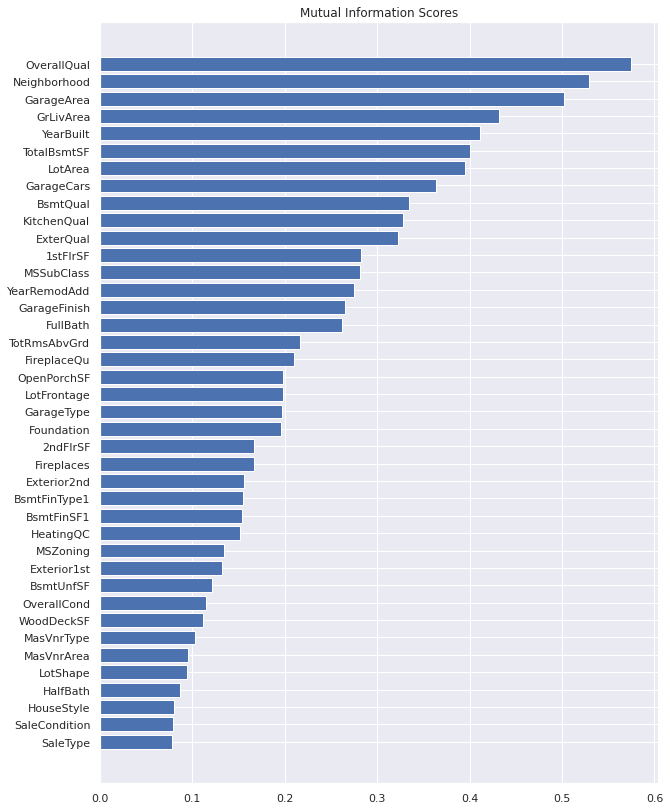

In [11]:
from sklearn.feature_selection import mutual_info_regression
cols = train.drop(columns=['Id', 'SalePrice']).columns

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
mi_scores = make_mi_scores(train[cols], train['SalePrice'])
plt.subplots(figsize=(10,14))
plot_mi_scores(mi_scores.head(40))

Looking at the scores with the highest level of mutual information, we can see that they mostly consist of variables related to the quality, location, and size of the property.

Let's look at the variables with the lowest levels of mutual information next.

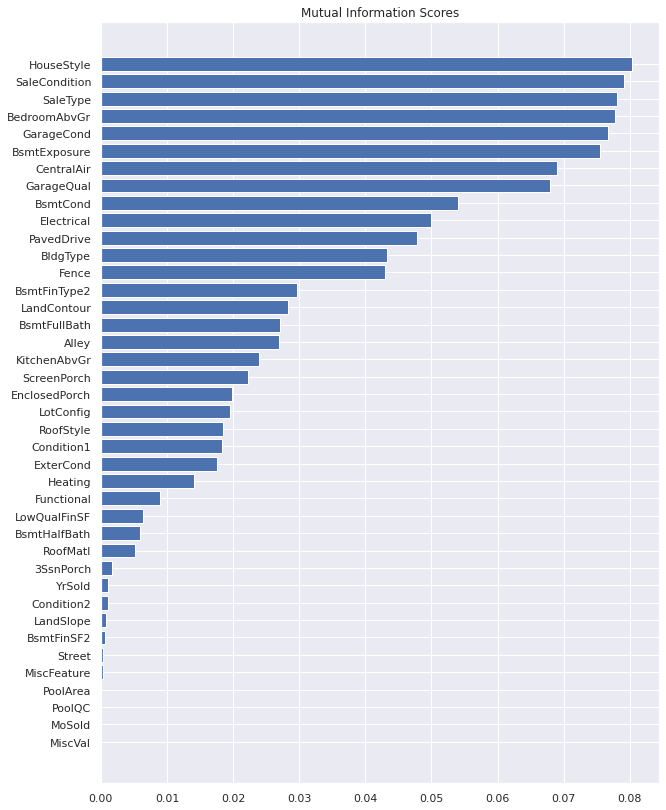

In [12]:
plt.subplots(figsize=(10,14))
plot_mi_scores(mi_scores.tail(40))

Comparing the variables with the lowest mutual information with the distribution of each variable that we looked at earlier, it looks like variables with low variance (mostly consisting of 1 value) like RoofMatl tend to have a lower score.

It also seems that less common features like PoolArea and BsmtHalfBath tend to contribute less to predicting sale price.

Based on this, I've decided to proceed with only the top 45 columns.

In [13]:
top_cols = mi_scores.head(45).index.values.tolist()
top_cols.append('SalePrice')
new_train = train[top_cols]
top_cols.remove('SalePrice')
new_test = test[top_cols]

new_train.head()

,OverallQual,Neighborhood,GarageArea,GrLivArea,YearBuilt,TotalBsmtSF,LotArea,GarageCars,BsmtQual,KitchenQual,ExterQual,1stFlrSF,MSSubClass,YearRemodAdd,GarageFinish,FullBath,TotRmsAbvGrd,FireplaceQu,OpenPorchSF,LotFrontage,GarageType,Foundation,2ndFlrSF,Fireplaces,Exterior2nd,BsmtFinType1,BsmtFinSF1,HeatingQC,MSZoning,Exterior1st,BsmtUnfSF,OverallCond,WoodDeckSF,MasVnrType,MasVnrArea,LotShape,HalfBath,HouseStyle,SaleCondition,SaleType,BedroomAbvGr,GarageCond,BsmtExposure,CentralAir,GarageQual,SalePrice
0,7,CollgCr,548,1710,2003,856,8450,2,Gd,Gd,Gd,856,60,2003,RFn,2,8,NA,61,65.0,Attchd,PConc,854,0,VinylSd,GLQ,706,Ex,RL,VinylSd,150,5,0,BrkFace,196.0,Reg,1,2Story,Normal,WD,3,TA,No,Y,TA,208500
1,6,Veenker,460,1262,1976,1262,9600,2,Gd,TA,TA,1262,20,1976,RFn,2,6,TA,0,80.0,Attchd,CBlock,0,1,MetalSd,ALQ,978,Ex,RL,MetalSd,284,8,298,None,0.0,Reg,0,1Story,Normal,WD,3,TA,Gd,Y,TA,181500
2,7,CollgCr,608,1786,2001,920,11250,2,Gd,Gd,Gd,920,60,2002,RFn,2,6,TA,42,68.0,Attchd,PConc,866,1,VinylSd,GLQ,486,Ex,RL,VinylSd,434,5,0,BrkFace,162.0,IR1,1,2Story,Normal,WD,3,TA,Mn,Y,TA,223500
3,7,Crawfor,642,1717,1915,756,9550,3,TA,Gd,TA,961,70,1970,Unf,1,7,Gd,35,60.0,Detchd,BrkTil,756,1,Wd Shng,ALQ,216,Gd,RL,Wd Sdng,540,5,0,None,0.0,IR1,0,2Story,Abnorml,WD,3,TA,No,Y,TA,140000
4,8,NoRidge,836,2198,2000,1145,14260,3,Gd,Gd,Gd,1145,60,2000,RFn,2,9,TA,84,84.0,Attchd,PConc,1053,1,VinylSd,GLQ,655,Ex,RL,VinylSd,490,5,192,BrkFace,350.0,IR1,1,2Story,Normal,WD,4,TA,Av,Y,TA,250000


## C. Deal with Categorical Data

We also need to convert our categorical features into numerical features so we can use them in our model.

For the columns representing the quality of a home feature, we can use **ordinal encoding**, since the values within have a rank order.

Let's create our ordinal and dummy data columns.

In [14]:
ord_encoding_cols = ['ExterQual', 'HeatingQC', 'KitchenQual']
quality_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

new_train[ord_encoding_cols] = new_train[ord_encoding_cols].replace(quality_map)
new_test[ord_encoding_cols] = new_test[ord_encoding_cols].replace(quality_map)

new_train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,OverallQual,Neighborhood,GarageArea,GrLivArea,YearBuilt,TotalBsmtSF,LotArea,GarageCars,BsmtQual,KitchenQual,ExterQual,1stFlrSF,MSSubClass,YearRemodAdd,GarageFinish,FullBath,TotRmsAbvGrd,FireplaceQu,OpenPorchSF,LotFrontage,GarageType,Foundation,2ndFlrSF,Fireplaces,Exterior2nd,BsmtFinType1,BsmtFinSF1,HeatingQC,MSZoning,Exterior1st,BsmtUnfSF,OverallCond,WoodDeckSF,MasVnrType,MasVnrArea,LotShape,HalfBath,HouseStyle,SaleCondition,SaleType,BedroomAbvGr,GarageCond,BsmtExposure,CentralAir,GarageQual,SalePrice
0,7,CollgCr,548,1710,2003,856,8450,2,Gd,4,4,856,60,2003,RFn,2,8,NA,61,65.0,Attchd,PConc,854,0,VinylSd,GLQ,706,5,RL,VinylSd,150,5,0,BrkFace,196.0,Reg,1,2Story,Normal,WD,3,TA,No,Y,TA,208500
1,6,Veenker,460,1262,1976,1262,9600,2,Gd,3,3,1262,20,1976,RFn,2,6,TA,0,80.0,Attchd,CBlock,0,1,MetalSd,ALQ,978,5,RL,MetalSd,284,8,298,None,0.0,Reg,0,1Story,Normal,WD,3,TA,Gd,Y,TA,181500
2,7,CollgCr,608,1786,2001,920,11250,2,Gd,4,4,920,60,2002,RFn,2,6,TA,42,68.0,Attchd,PConc,866,1,VinylSd,GLQ,486,5,RL,VinylSd,434,5,0,BrkFace,162.0,IR1,1,2Story,Normal,WD,3,TA,Mn,Y,TA,223500
3,7,Crawfor,642,1717,1915,756,9550,3,TA,4,3,961,70,1970,Unf,1,7,Gd,35,60.0,Detchd,BrkTil,756,1,Wd Shng,ALQ,216,4,RL,Wd Sdng,540,5,0,None,0.0,IR1,0,2Story,Abnorml,WD,3,TA,No,Y,TA,140000
4,8,NoRidge,836,2198,2000,1145,14260,3,Gd,4,4,1145,60,2000,RFn,2,9,TA,84,84.0,Attchd,PConc,1053,1,VinylSd,GLQ,655,5,RL,VinylSd,490,5,192,BrkFace,350.0,IR1,1,2Story,Normal,WD,4,TA,Av,Y,TA,250000


For the remaining categorical features, we'll use **binary encoding**.

In [15]:
ord_cols = ['OverallQual', 
            'OverallCond', 
            'ExterQual', 
            'HeatingQC', 
            'KitchenQual']

numeric_cols = list(new_train.select_dtypes(['int64', 'float64']).drop(columns=ord_cols).columns.values)

dummy_data_train = pd.get_dummies(new_train.select_dtypes(['object', 'category']))
new_new_train = pd.concat([dummy_data_train, new_train[ord_cols], new_train[numeric_cols]], axis=1)

numeric_cols.remove('SalePrice')
dummy_data_test = pd.get_dummies(new_test.select_dtypes(['object', 'category']))
new_new_test = pd.concat([dummy_data_test, new_test[ord_cols], new_test[numeric_cols]], axis=1)

new_new_train.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,CentralAir_N,CentralAir_Y,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,OverallQual,OverallCond,ExterQual,HeatingQC,KitchenQual,GarageArea,GrLivArea,YearBuilt,TotalBsmtSF,LotArea,GarageCars,1stFlrSF,MSSubClass,YearRemodAdd,FullBath,TotRmsAbvGrd,OpenPorchSF,LotFrontage,2ndFlrSF,Fireplaces,BsmtFinSF1,BsmtUnfSF,WoodDeckSF,MasVnrArea,HalfBath,BedroomAbvGr,SalePrice
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,7,5,4,5,4,548,1710,2003,856,8450,2,856,60,2003,2,8,61,65.0,854,0,706,150,0,196.0,1,3,208500
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,6,8,3,5,3,460,1262,1976,1262,9600,2,1262,20,1976,2,6,0,80.0,0,1,978,284,298,0.0,0,3,181500
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,7,5,4,5,4,608,1786,2001,920,11250,2,920,60,2002,2,6,42,68.0,866,1,486,434,0,162.

GarageFinish_NA and BsmtFinType1_NA are either duplicates of GarageType_NA and BsmtQual_NA, so let's remove these.

In [16]:
duplicate_cols = ['GarageFinish_NA', 'BsmtFinType1_NA']
new_new_train = new_new_train.drop(columns=duplicate_cols)
new_new_test = new_new_test.drop(columns=duplicate_cols)

In [17]:
new_new_train.shape

(1460, 172)

After creating dummy columns for our categorical variables, we end up with a total of 172 columns.

Now let's try creating a few different models and see how they perform.

# <span style="color:green;"> III. Create and Validate Model </span>
For this competition, the main metric we'll be using to evaluate our models is the Root Mean Squared Error, commonly shortened to **RMSE**. 

We'll also use **R-squared** to evaluate the fit of our model.

However, if we only use the data we used to train our model to evaluate it, we will likely get an artificially high score since our model has already seen the data. Since our goal is to create a model that accurately predicts housing prices for data that the model hasn't seen, it is common practice to separate our training data into training and evaluation datasets, and use the latter to evaluate how our model performs on unseen data. This also helps us avoid **overfitting** our model to the training data by only improving the training dataset's evaluation metric.

An additional method we can use is **cross-validation**, which allows us to simulate having a larger sample by repeatedly splitting our data into train and evaluation datasets and evaluating our model, using a different section of the data each time.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

cols = new_new_train.drop(columns=['SalePrice']).columns

X_train, X_val, y_train, y_val = train_test_split(new_new_train[cols], 
                                                  new_new_train['SalePrice'], 
                                                  test_size=.15, 
                                                  random_state=1)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.fit_transform(X_val[numeric_cols])

### Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

scores = cross_val_score(lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(lr, X_val, y_val, scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-1411038487555769.8

Validation:
-4765721704848031.0


In [20]:
r2_score(y_train, lr.predict(X_train))

0.8809919329816972

We ended up with some extremely large RMSE values for both our training and evaluation data.

One reason for this could be outliers. Let's check the distribution of the SalePrice column to see if there are any abnormal values.

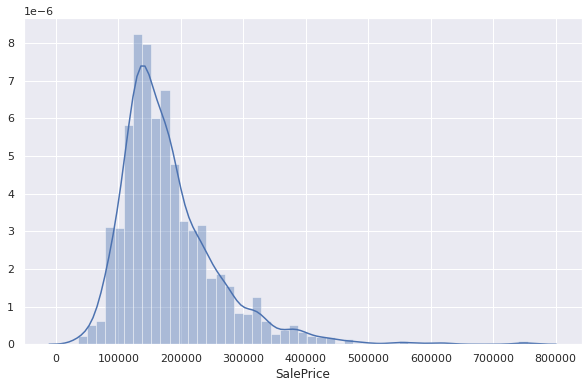

In [21]:
plt.subplots(figsize=(10,6))
sns.distplot(train['SalePrice'])

It looks like the distribution of SalePrice is skewed to the right, or in other words we have a few outliers on the high end of SalePrice.

One possible solution for this is to **log-transform** SalePrice. This allows us to convert the target variable to a more symmetrical distribution that will work better with our models, and then we can transform the data back after we make our predictions.

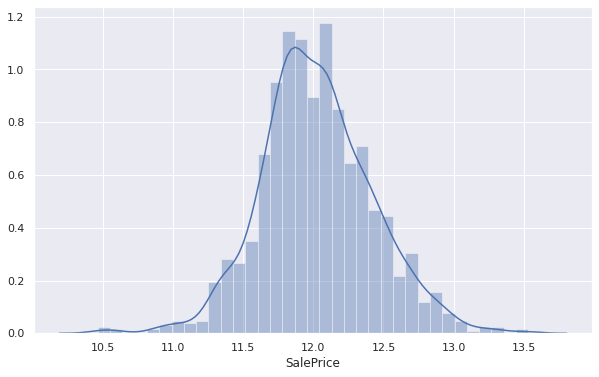

In [22]:
plt.subplots(figsize=(10,6))
sns.distplot(np.log(train['SalePrice']))

As you can see above the distribution of SalePrice is much closer to a normal distribution than before.

Let's re-run our model using the log-transformed SalePrice.

In [23]:
lr = LinearRegression()
lr.fit(X_train, np.log(y_train))

scores = cross_val_score(lr, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(lr, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-5706703648.216389

Validation:
-22557175704.829575


In [24]:
r2_score(y_val, np.exp(lr.predict(X_val)))

0.9098119926298492

The train and validation scores both improved significantly, but they are still quite large. Another possible explanation for this is that multicollinearity is occurring. **Multicollinearity** occurs when two or more independant variables are highly correlated with each other, and thus the model is unable to tell which variable is explaining the variance in the target.

There are two special types of regression models that were made to deal with this problem, Ridge regression and Lasso regression.

Let's try both of these and see how they perform.

### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge

rdg = Ridge(random_state=1)
rdg.fit(X_train, np.log(y_train))

scores = cross_val_score(rdg, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(rdg, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-0.1477015674092966

Validation:
-0.15278601770670988


In [26]:
r2_score(y_val, np.exp(rdg.predict(X_val)))

0.9149066575958448

### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=1)
lasso.fit(X_train, np.log(y_train))

scores = cross_val_score(lasso, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(lasso, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-0.39544127915474336

Validation:
-0.40496127078332267


In [28]:
r2_score(y_val, np.exp(lasso.predict(X_val)))

-0.017076161959435954

Using Ridge and Lasso regression we were able to significantly improve our RMSE, with Ridge regression performing especially well!

Now let's try a few non-linear methods, specifically Random Forest, K-Nearest Neighbors, and Support Vector Machine.

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, np.log(y_train))

scores = cross_val_score(rf, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(rf, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-0.14257564082999244

Validation:
-0.14968259290338382


In [30]:
r2_score(y_val, np.exp(rf.predict(X_val)))

0.9059240222654368

### K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, np.log(y_train))

scores = cross_val_score(knn, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(knn, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-0.16164759950967902

Validation:
-0.15997616715451676


In [32]:
r2_score(y_val, np.exp(knn.predict(X_val)))

0.8986449540187538

### Support Vector Machine

In [33]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, np.log(y_train))

scores = cross_val_score(svm, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(svm, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-0.12315360006504947

Validation:
-0.12566393389030964


In [34]:
r2_score(y_val, np.exp(svm.predict(X_val)))

0.9389663571763714

It looks like the best performing models were Ridge Regression, Random Forest, K Nearest Neighbors, and Support Vector Machine, with Support Vector Machine performing especially well.

# <span style="color:green;"> IV. Tune Hyperparameters </span>
Now let's adjust the hyperparameters of our model and see if we can further improve performance.

In [35]:
from sklearn.model_selection import GridSearchCV

svm = SVR()
hyperparameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [2, 1.5, 1, .75],
    'gamma': [.0075, .005, .0025, .001]
                   }


gs = GridSearchCV(svm, param_grid=hyperparameters, cv=5, scoring='neg_root_mean_squared_error')
gs.fit(X_train, np.log(y_train))

best_params = gs.best_params_
best_score = gs.best_score_

print(best_params) 
print(best_score)

{'C': 2, 'gamma': 0.0025, 'kernel': 'rbf'}
-0.12345708343474522


After further tuning the parameters, the following hyperparameters resulted in the lowest score:
* kernel: rbf
* C: 1.95
* gamma: .0025

Let's confirm this with the method we used earlier.

In [36]:
svm = SVR(kernel='rbf', C=1.95, gamma=.0025)
svm.fit(X_train, np.log(y_train))

scores = cross_val_score(svm, X_train, np.log(y_train), scoring='neg_root_mean_squared_error', cv=10)
print('Train:')
print(np.mean(scores))
print()
scores = cross_val_score(svm, X_val, np.log(y_val), scoring='neg_root_mean_squared_error', cv=10)
print('Validation:')
print(np.mean(scores))

Train:
-0.12239153057808505

Validation:
-0.12175428624507538


Our best score yet! Let's use this model for our submission.

In [37]:
def save_submission(model, cols, filename='submission.csv'):
    test_data = new_new_test[cols]
    predictions = np.exp(model.predict(test_data))
    ids = test['Id']
    submission_df = {"Id": ids,
                    'SalePrice': predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)

new_new_test[numeric_cols] = scaler.fit_transform(new_new_test[numeric_cols])

not_in_test = ['GarageQual_Ex', 'Exterior2nd_Other', 'HouseStyle_2.5Fin', 'Exterior1st_Stone', 'Exterior1st_ImStucc']
test_cols = list(cols.copy())
for i in not_in_test:
    test_cols.remove(i)

svm = SVR(kernel='rbf', C=1.95, gamma=.0025)
svm.fit(X_train[test_cols], np.log(y_train))

save_submission(svm, test_cols)

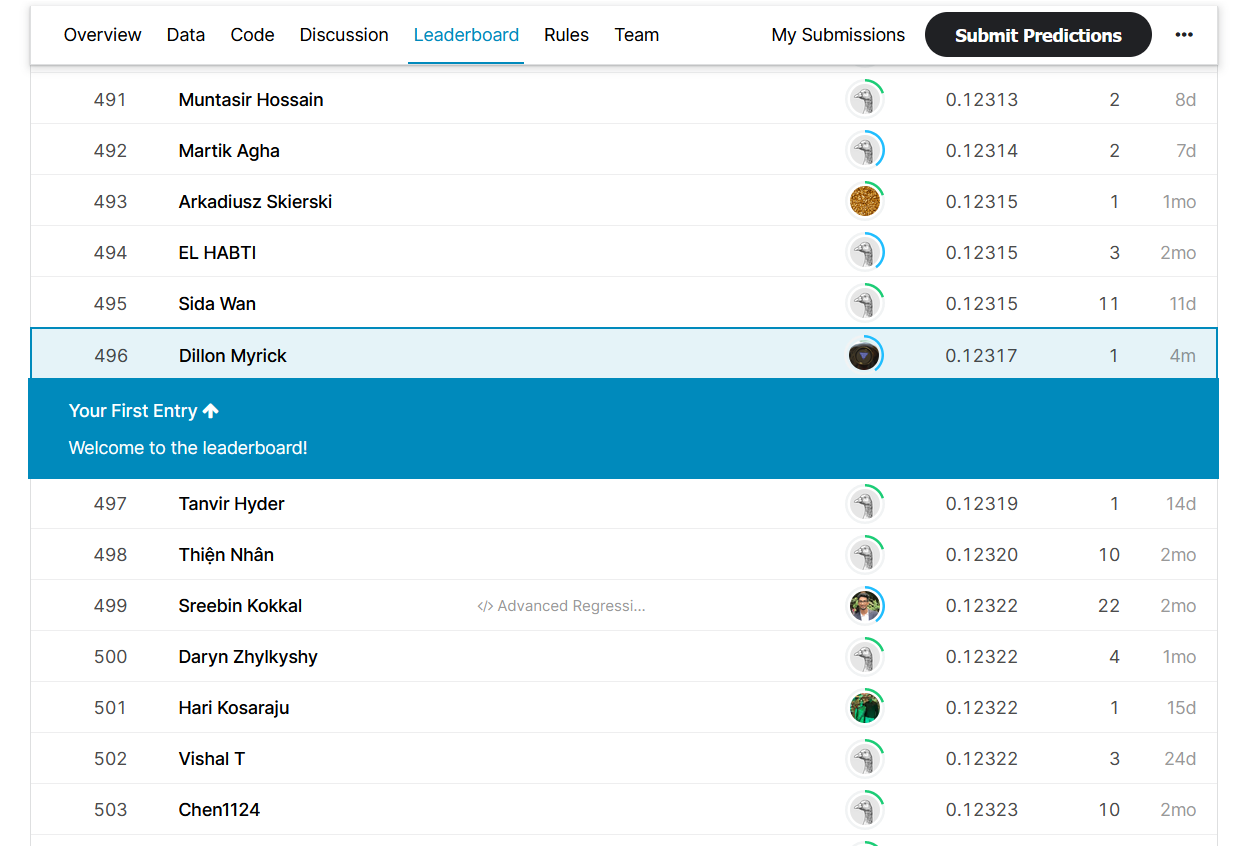

We made it into the top 12% of submissions, not bad!

Thank you for reading!